In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
from keras.preprocessing import image
import re
import glob

In [2]:
# Data paths
data_train = '../Data Source/train_banana/'
csv_train = '../Meta data/train.csv'
data_val = '../Data Source/val_banana/'
csv_val = '../Meta data/val.csv'

In [3]:
# Get meta data for train and test
train = pd.read_csv(csv_train)    
val = pd.read_csv(csv_val) 

In [4]:
# Get the labels
labels = train['labels'].unique()
# Get the number of labels
data_size = len(labels)

In [5]:
# Get data for X Train and Validation set
X = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img(data_train+train['real_name'][i],target_size=(64,64,3))
    img = image.img_to_array(img)

    X.append(img)
X = np.array(X)
X.shape

100%|██████████| 16000/16000 [00:04<00:00, 3335.00it/s]


(16000, 64, 64, 3)

In [6]:
# Get data for y Train and Validation set
y = []
for data in tqdm(train.iterrows()):  
    y.append(data[1][1])
y = np.array(y)

y = tf.keras.utils.to_categorical(y , num_classes=data_size)
y.shape

16000it [00:01, 15375.56it/s]


(16000, 2)

In [7]:
# Get data for X Test set
X_v = []
for i in tqdm(range(val.shape[0])):
    img = image.load_img(data_val+val['real_name'][i],target_size=(64,64,3))
    img = image.img_to_array(img)

    X_v.append(img)
X_v = np.array(X_v)
X_v.shape

100%|██████████| 1600/1600 [00:00<00:00, 3213.24it/s]


(1600, 64, 64, 3)

In [8]:
# Get data for y Test set
y_v = []
for data in tqdm(val.iterrows()):  
    y_v.append(data[1][1])
y_v = np.array(y_v)

y_v = tf.keras.utils.to_categorical(y_v , num_classes=data_size)
y_v.shape

1600it [00:00, 14153.06it/s]


(1600, 2)

In [9]:
# Split data to Train, Validation and Test set
x_test ,y_test = X_v,y_v
x_train , x_val , y_train , y_val = train_test_split(X , y ,test_size=0.2)

In [10]:
# Get the input shape for the model
input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3])

In [11]:
# Build the model
def CNN_model(f1=3,f2=3):    
    
    model = keras.Sequential([
                                layers.Conv2D(16, (f1,f2), padding= 'same', activation='relu', input_shape=input_shape ),
                                layers.MaxPooling2D(2, padding='same'),
                                
                                layers.Conv2D(32, (f1,f2), padding= 'same', activation='relu'),
                                layers.MaxPooling2D(2, padding='same'),

                                layers.Conv2D(64, (f1,f2), padding= 'same', activation='relu'),
                                layers.MaxPooling2D(2, padding='same'),
            
                                           
                                layers.GlobalAveragePooling2D(),
            
                                layers.Dense(data_size, activation='softmax')
   
                                ])
    model.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])
    model.summary()

    return model

In [12]:
# Complie the model
model = CNN_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0

In [13]:
#Run the model
history = model.fit(x_train,y_train ,
            validation_data=(x_val,y_val),
            batch_size = 64,
            epochs=10)

Epoch 1/10
200/200 [==============================] - 12s 57ms/step - loss: 1.6024 - accuracy: 0.8485 - val_loss: 0.3336 - val_accuracy: 0.9078
Epoch 2/10
200/200 [==============================] - 11s 57ms/step - loss: 0.3458 - accuracy: 0.8968 - val_loss: 0.3686 - val_accuracy: 0.8919
Epoch 3/10
200/200 [==============================] - 13s 64ms/step - loss: 0.3062 - accuracy: 0.8972 - val_loss: 0.2242 - val_accuracy: 0.9228
Epoch 4/10
200/200 [==============================] - 13s 63ms/step - loss: 0.2374 - accuracy: 0.9239 - val_loss: 0.1631 - val_accuracy: 0.9494
Epoch 5/10
200/200 [==============================] - 12s 61ms/step - loss: 0.1726 - accuracy: 0.9440 - val_loss: 0.1422 - val_accuracy: 0.9613
Epoch 6/10
200/200 [==============================] - 13s 64ms/step - loss: 0.1556 - accuracy: 0.9509 - val_loss: 0.1413 - val_accuracy: 0.9569
Epoch 7/10
200/200 [==============================] - 14s 69ms/step - loss: 0.1376 - accuracy: 0.9584 - val_loss: 0.1288 - val_accuracy:

Text(0, 0.5, 'Loss')

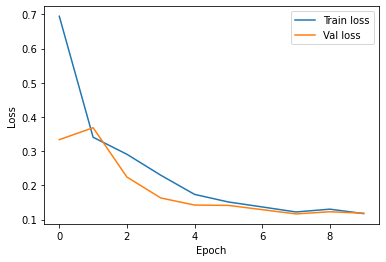

In [14]:
# Plot loss
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

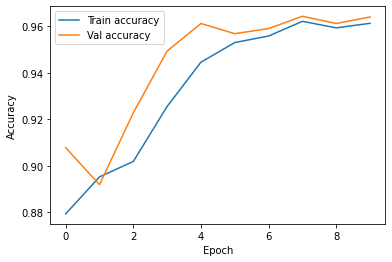

In [15]:
# Plot accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [16]:
# Compute Test loss and accuracy
test_score = model.evaluate(x_test, y_test, verbose=0)
print('{:<11s}{:>14s}{:>14s}'.format("", "Loss", "Accuracy %"))
print('-' * 40)
print('{:<10s}{:>14.4f}{:>14.4f}'.format( "Test:      ", test_score[0], 100 * test_score[1]))

                     Loss    Accuracy %
----------------------------------------
Test:              0.1012       97.0000


In [17]:
from sklearn.metrics import confusion_matrix
# Predict probabilities for test set
y_probs = model.predict(x_test, verbose=0)

# Get predicted category
yhat_probs = np.argmax(y_probs, axis=1)
y_trues = np.argmax(y_test, axis=1)

# Compute confusion matrix data
cm = confusion_matrix(y_trues, yhat_probs)

In [18]:
# Function plot confusion matrix
def plot_confusion_matrix(cm,
                          classes, 
                          normalized=False, 
                          title=None, 
                          cmap=plt.cm.Blues,
                          size=(data_size,data_size)):
    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True category',
           xlabel='Predicted category')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    fmt = '.2f' if normalized else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    plt.show()

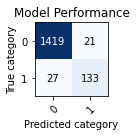

In [19]:
# Pilot the matrix for True and Predicted categories
plot_confusion_matrix(cm,labels,normalized=False, 
                          title="Model Performance", 
                          cmap=plt.cm.Blues,size=(data_size,data_size))

In [20]:
# Calculate Total, Correct and Accuracy for each Category
np_probs_array = cm
accs = []
corrects = []
totals = []
for idx in range(0, np_probs_array.shape[0]):
    correct = np_probs_array[idx][idx].astype(int)
    total = np_probs_array[idx].sum().astype(int)
    acc = (correct / total) * 100
    accs.append(acc)
    corrects.append(correct)
    totals.append(total)

In [21]:
# Show the results for each category
pd.DataFrame({
    'Categories': labels,
    'Correct': corrects,
    'Total': totals,
    'Accuracy %': accs
}).sort_values(by='Accuracy %', ascending=False)

Categories  Correct  Total  Accuracy %
0           0     1419   1440   98.541667
1           1      133    160   83.125000

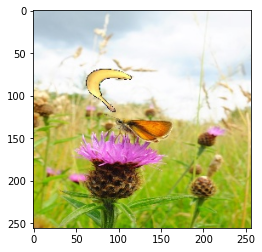

In [22]:
# Load the data to test
real_test_path = ("../Data Source/bananas_val/images/")
file_name = "55"
image = image.load_img(real_test_path + file_name + ".png")
plt.imshow(image)

In [23]:
# Sort function
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts
path = sorted(glob.glob(data_val+file_name+"_*.png"), key=numericalSort)

In [24]:
# Split the image to grids
from keras.preprocessing import image
list_img = []
for img in path:
    n = image.load_img(img)
    list_img.append(np.array(n))

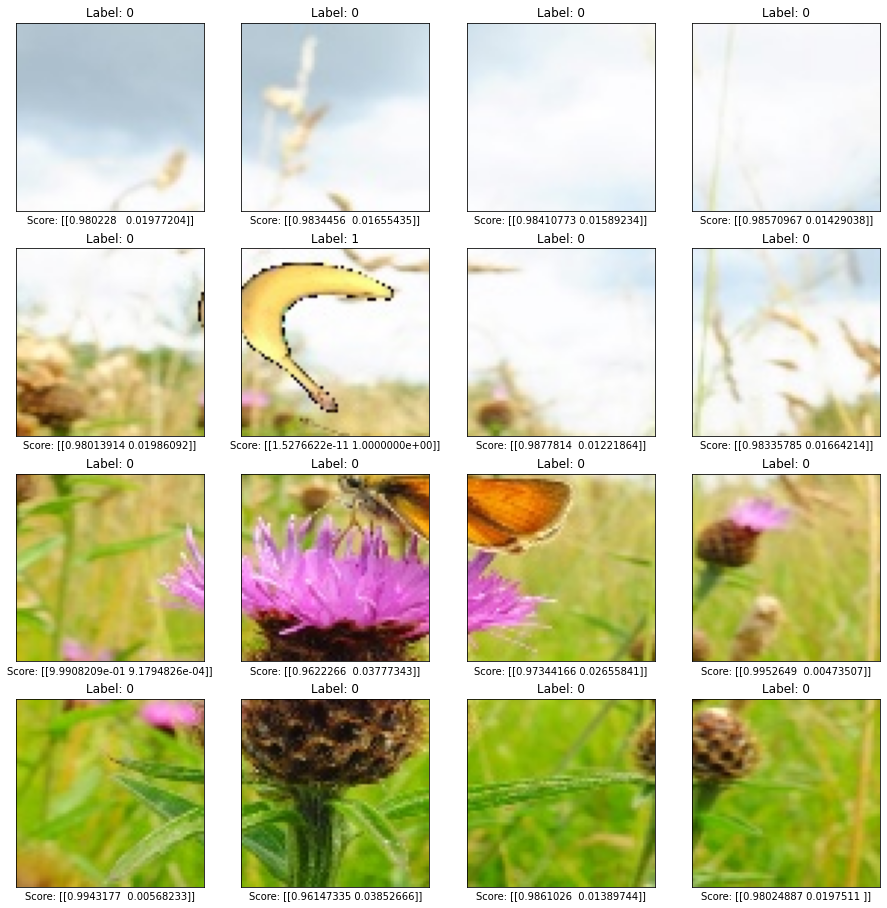

In [27]:
# Show the prediction with the labels and the scores 
# Label 0: not banana, 1: banana
# Score: (n,m) n is label 0 score, m is label 1 score

fig = plt.figure(figsize=(15, 15))
rows = 4
columns = 4

for i in range (0, 16): 
    img2 = list_img[i].reshape(1,list_img[i].shape[0],list_img[i].shape[1],list_img[i].shape[2])
    fig.add_subplot(rows, columns, i+1)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.2)
    score = model.predict(img2)
    label = labels[np.argmax(score)]
    plt.title("Label: " +str(label))
    plt.imshow(list_img[i])
    plt.xlabel("Score: " +str(score))
    plt.xticks([])
    plt.yticks([])